# World Happiness Report & Economic Data Analysis

## Economic datasets: https://databank.worldbank.org/source/world-development-indicators#

# Table of Contents
1. [Introduction](#Introduction)
2. [Loading and Combining Datasets](#Loading-and-combining-datasets)
3. [Merging Economic Data](#Merging-Economic-Data)
4. [Visualize the Data](#Visualize-Data)
5. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing) Includes Handling Missing Data
6. [Feature Engineering](#Feature-Engineering)
7. [Model Selection](#Model-selection)
8. [Model Training and Evaluation](#model-training-and-evaluation)
9. [Conclusion](#conclusion)


## Introduction

# ADD INTRO HERE

## Loading and combining datasets

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Helper functions:

In [2]:
# Loop through the years 2015-2019
for year in range(2015, 2020):
    # Read the CSV file from the corresponding folder
    filepath = f'datasets/{year}/{year}.csv'
    df = pd.read_csv(filepath)
    
    # Add a new column 'year' to the dataframe and fill it with the corresponding year
    df['year'] = year
    
    # Display the first few rows of the dataframe
    print(f"Year {year}:")
    print(df.head())
    print("\n")


Year 2015:
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938

In [3]:
def standardize_columns(df):
    column_mapping = {
        'Happiness.Rank': 'Happiness Rank',
        'Happiness.Score': 'Happiness Score',
        'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
        'Health..Life.Expectancy.': 'Health (Life Expectancy)',
        'Trust..Government.Corruption.': 'Trust (Government Corruption)',
        'Dystopia.Residual': 'Dystopia Residual',
        'Overall rank': 'Happiness Rank',
        'Country or region': 'Country',
        'Score': 'Happiness Score',
        'GDP per capita': 'Economy (GDP per Capita)',
        'Social support': 'Family',
        'Healthy life expectancy': 'Health (Life Expectancy)',
        'Freedom to make life choices': 'Freedom',
        'Perceptions of corruption': 'Trust (Government Corruption)',
    }
    
    df = df.rename(columns=column_mapping)
    return df


In [4]:
def fill_missing_columns(df, columns):
    for column in columns:
        if column not in df.columns:
            df[column] = float('nan')
    return df


In [5]:
# Define the standard columns
standard_columns = [
    'Country', 'year', 'Happiness Rank', 'Happiness Score',
    'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
    'Freedom', 'Trust (Government Corruption)', 'Generosity',
    'Dystopia Residual'
]

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through the years 2015-2019
for year in range(2015, 2020):
    # Read the CSV file from the corresponding folder
    filepath = f'datasets/{year}/{year}.csv'
    df = pd.read_csv(filepath)
    
    # Add a new column 'year' to the dataframe and fill it with the corresponding year
    df['year'] = year
    
    # Standardize the column names
    df = standardize_columns(df)
    
    # Fill in any missing columns with NaN
    df = fill_missing_columns(df, standard_columns)
    
    # Select only the standard columns
    df = df[standard_columns]
    
    # Append the dataframe to the list of dataframes
    dataframes.append(df)


In [6]:
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,Country,year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,2019,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN
778,Tanzania,2019,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN
779,Afghanistan,2019,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN
780,Central African Republic,2019,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN


# Merging Economic Data

# Only for Israel

In [7]:
# Read the CSV file from the corresponding folder
eco_path = f'datasets/Eco_data.csv'
israel_eco_data = pd.read_csv(eco_path)
israel_eco_data


,Country Name,Country Code,Series Name,Series Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Israel,ISR,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000
1,Israel,ISR,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000
2,Israel,ISR,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,1.418493,1.448635,1.431974,1.385569,1.338553
3,Israel,ISR,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,28.041051,28.089027,27.318128,29.021044,27.047940
4,Israel,ISR,"Industry (including construction), value added...",NV.IND.TOTL.ZS,19.822742,18.973514,18.386093,18.613306,18.634297
5,Israel,ISR,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,12.754977,11.905269,11.320437,11.492926,11.394308
6,Israel,ISR,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,5.489119,5.467031,5.475427,5.325956,5.110442
7,Israel,ISR,Tax revenue (% of GDP),GC.TAX.TOTL.GD.ZS,23.065472,23.056862,24.240975,22.694092,22.109376


In [8]:
# Drop unnecessary columns
israel_eco_data = israel_eco_data.drop(['Country Code', 'Series Code'], axis=1)

# Reshape the dataframe using the melt function
israel_eco_data_melted = pd.melt(israel_eco_data, id_vars=['Country Name', 'Series Name'], var_name='year', value_name='value')

# Pivot the dataframe to have 'Series Name' values as columns
israel_eco_data_pivoted = israel_eco_data_melted.pivot_table(index=['Country Name', 'year'], columns='Series Name', values='value').reset_index()

# Rename the 'Country Name' column to 'Country' for consistency
israel_eco_data_pivoted = israel_eco_data_pivoted.rename(columns={'Country Name': 'Country'})

# Convert the year column to integer
israel_eco_data_pivoted['year'] = israel_eco_data_pivoted['year'].str.extract('(\d+)').astype(int)
israel_eco_data_pivoted

Series Name,Country,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Agriculture, forestry, and fishing, value added (% of GDP)",Imports of goods and services (% of GDP),"Industry (including construction), value added (% of GDP)","Manufacturing, value added (% of GDP)",Military expenditure (% of GDP),Tax revenue (% of GDP)
0,Israel,2015,100.0,100.0,1.418493,28.041051,19.822742,12.754977,5.489119,23.065472
1,Israel,2016,100.0,100.0,1.448635,28.089027,18.973514,11.905269,5.467031,23.056862
2,Israel,2017,100.0,100.0,1.431974,27.318128,18.386093,11.320437,5.475427,24.240975
3,Israel,2018,100.0,100.0,1.385569,29.021044,18.613306,11.492926,5.325956,22.694092
4,Israel,2019,100.0,100.0,1.338553,27.047940,18.634297,11.394308,5.110442,22.109376


In [9]:
# Filter the WHR data for Israel
israel_whr_data = combined_df[combined_df['Country'] == 'Israel']

# Merge the WHR data and the new economic data for Israel
israel_data_merged = pd.merge(israel_whr_data, israel_eco_data_pivoted, on=['Country', 'year'])
israel_data_merged

,Country,year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Agriculture, forestry, and fishing, value added (% of GDP)",Imports of goods and services (% of GDP),"Industry (including construction), value added (% of GDP)","Manufacturing, value added (% of GDP)",Military expenditure (% of GDP),Tax revenue (% of GDP)
0,Israel,2015,11,7.278,1.228570,1.22393,0.913870,0.413190,0.077850,0.331720,3.088540,100.0,100.0,1.418493,28.041051,19.822742,12.754977,5.489119,23.065472
1,Israel,2016,11,7.267,1.337660,0.99537,0.849170,0.364320,0.087280,0.322880,3.310290,100.0,100.0,1.448635,28.089027,18.973514,11.905269,5.467031,23.056862
2,Israel,2017,11,7.213,1.375382,1.37629,0.838404,0.405989,0.085242,0.330083,2.801757,100.0,100.0,1.431974,27.318128,18.386093,11.320437,5.475427,24.240975
3,Israel,2018,19,6.814,1.301000,1.55900,0.883000,0.533000,0.272000,0.354000,NaN,100.0,100.0,1.385569,29.021044,18.613306,11.492926,5.325956,22.694092
4,Israel,2019,13,7.139,1.276000,1.45500,1.029000,0.371000,0.082000,0.261000,NaN,100.0,100.0,1.338553,27.047940,18.634297,11.394308,5.110442,22.109376


# The whole world

In [10]:
# Read the economic data CSV file
world_eco_path = f'datasets/world_economy.csv'
new_eco_data = pd.read_csv(world_eco_path)
new_eco_data

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Israel,ISR,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100
1,Israel,ISR,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,100,100,100,100,100
2,Israel,ISR,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,1.418492836,1.448634907,1.431974316,1.385569111,1.338553005
3,Israel,ISR,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,28.04105109,28.08902666,27.31812806,29.02104382,27.04794045
4,Israel,ISR,"Industry (including construction), value added...",NV.IND.TOTL.ZS,19.82274245,18.97351387,18.38609253,18.61330645,18.63429673
...,...,...,...,...,...,...,...,...,...
2123,World,WLD,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,27.59273887,26.62679695,27.56612193,28.53691444,27.77673399
2124,World,WLD,"Industry (including construction), value added...",NV.IND.TOTL.ZS,26.83202447,26.28263514,26.75704068,27.22290626,26.69576164
2125,World,WLD,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,16.39695325,16.20163734,16.26174169,16.38936987,15.98546945
2126,World,WLD,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,2.26043519,2.218343398,2.173431495,2.151094186,2.192591439


In [11]:
# Drop unnecessary columns
new_eco_data = new_eco_data.drop(['Country Code', 'Series Code'], axis=1)

# Reshape the dataframe using the melt function
new_eco_data_melted = pd.melt(new_eco_data, id_vars=['Country Name', 'Series Name'], var_name='year', value_name='value')

# Convert the year column to integer
new_eco_data_melted['year'] = new_eco_data_melted['year'].str.extract('(\d+)').astype(int)

# Convert the value column to numeric, coercing non-numeric values to NaN
new_eco_data_melted['value'] = pd.to_numeric(new_eco_data_melted['value'], errors='coerce')

# Pivot the dataframe to have 'Series Name' values as columns
new_eco_data_pivoted = new_eco_data_melted.pivot_table(index=['Country Name', 'year'], columns='Series Name', values='value', aggfunc='mean').reset_index()

# Rename the 'Country Name' column to 'Country' for consistency
new_eco_data_pivoted = new_eco_data_pivoted.rename(columns={'Country Name': 'Country'})
new_eco_data_pivoted

Series Name,Country,year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Agriculture, forestry, and fishing, value added (% of GDP)",Imports of goods and services (% of GDP),"Industry (including construction), value added (% of GDP)","Manufacturing, value added (% of GDP)",Military expenditure (% of GDP),Tax revenue (% of GDP)
0,Afghanistan,2015,27.4,71.500000,20.634323,NaN,22.124042,11.420006,0.994576,7.585382
1,Afghanistan,2016,28.6,97.699997,25.740314,NaN,10.466808,4.114197,0.956772,9.502653
2,Afghanistan,2017,29.7,97.699997,26.420199,NaN,10.051874,3.530422,0.945227,9.898451
3,Afghanistan,2018,30.9,96.616135,22.042897,NaN,13.387247,6.160177,1.006746,NaN
4,Afghanistan,2019,31.9,97.699997,25.773971,NaN,14.058112,7.043181,1.118231,NaN
...,...,...,...,...,...,...,...,...,...,...
1320,Zimbabwe,2015,29.5,33.700001,8.284247,37.588635,22.358392,11.888599,1.886876,17.673363
1321,Zimbabwe,2016,29.8,42.561729,7.873986,31.275493,22.115059,11.596020,1.720991,15.458341
1322,Zimbabwe,2017,29.8,44.178635,8.340969,30.370807,21.404999,11.017009,0.387831,15.874375
1323,Zimbabwe,2018,29.9,45.572647,7.319375,28.386297,31.037898,13.678137,0.309323,7.214765


In [12]:
# Find the countries that exist in both datasets
common_countries = set(combined_df['Country']).intersection(set(new_eco_data_pivoted['Country']))

# Filter the WHR data and the new economic data for the common countries
whr_data_common = combined_df[combined_df['Country'].isin(common_countries)]
new_eco_data_common = new_eco_data_pivoted[new_eco_data_pivoted['Country'].isin(common_countries)]

# Merge the WHR data and the new economic data for the common countries
merged_data = pd.merge(whr_data_common, new_eco_data_common, on=['Country', 'year'])
merged_data


,Country,year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Agriculture, forestry, and fishing, value added (% of GDP)",Imports of goods and services (% of GDP),"Industry (including construction), value added (% of GDP)","Manufacturing, value added (% of GDP)",Military expenditure (% of GDP),Tax revenue (% of GDP)
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,100.0,100.000000,0.626446,53.309526,24.201126,17.118658,0.643891,9.556179
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,100.0,100.000000,5.280670,44.166486,20.195136,10.667453,NaN,22.689444
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,100.0,100.000000,0.957580,48.630054,19.987455,12.403445,1.111446,33.921619
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,100.0,100.000000,1.537558,32.057350,31.010379,6.873817,1.507280,22.223551
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,100.0,100.000000,1.869836,34.314941,24.415683,9.975423,1.152709,12.389811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Rwanda,2019,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,1.9,40.368607,23.545797,36.125688,18.864151,8.366595,1.239645,14.595448
673,Tanzania,2019,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,4.3,37.659687,26.546415,16.951259,28.620195,8.486499,1.017767,NaN
674,Afghanistan,2019,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,31.9,97.699997,25.773971,NaN,14.058112,7.043181,1.118231,NaN
675,Central African Republic,2019,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,0.7,14.300000,28.341832,34.310420,20.511971,17.782321,1.915529,8.318458


# Visualize Data

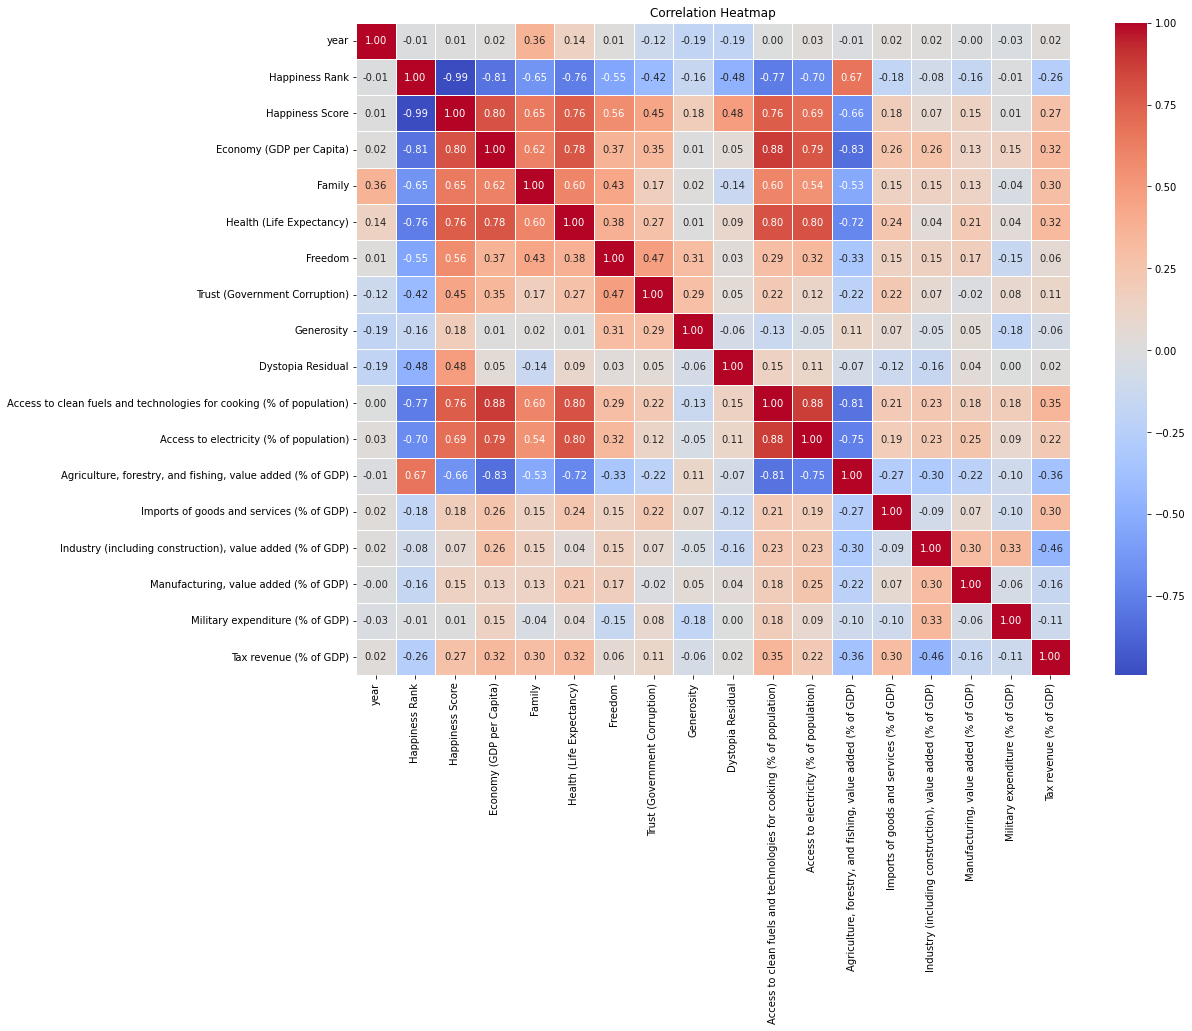

In [13]:
# Calculate the correlation matrix
corr_matrix = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


# Data Cleaning and Preprocessing

## 1. Deal with missing data:

In [14]:
# Set a threshold for the percentage of missing values you are willing to accept
threshold = 0.7

# Drop columns with more missing values than the threshold
missing_column_ratio = merged_data.isnull().mean()
merged_data = merged_data.loc[:, missing_column_ratio <= threshold]

# Drop rows with more missing values than the threshold
missing_row_ratio = merged_data.isnull().mean(axis=1)
merged_data = merged_data.loc[missing_row_ratio <= threshold, :]

# Impute missing values using SimpleImputer from scikit-learn
from sklearn.impute import SimpleImputer

# Change the 'year' column to a string type
merged_data['year'] = merged_data['year'].astype(str)

# Use the mean imputation strategy for numeric columns
numeric_columns = merged_data.select_dtypes(include=['number']).columns
mean_imputer = SimpleImputer(strategy='mean')
merged_data[numeric_columns] = mean_imputer.fit_transform(merged_data[numeric_columns])



# Use the most frequent value (mode) imputation strategy for categorical columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns
mode_imputer = SimpleImputer(strategy='most_frequent')
merged_data[categorical_columns] = mode_imputer.fit_transform(merged_data[categorical_columns])
merged_data

,Country,year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Agriculture, forestry, and fishing, value added (% of GDP)",Imports of goods and services (% of GDP),"Industry (including construction), value added (% of GDP)","Manufacturing, value added (% of GDP)",Military expenditure (% of GDP),Tax revenue (% of GDP)
0,Switzerland,2015,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.517380,100.0,100.000000,0.626446,53.309526,24.201126,17.118658,0.643891,9.556179
1,Iceland,2015,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.702010,100.0,100.000000,5.280670,44.166486,20.195136,10.667453,1.828786,22.689444
2,Denmark,2015,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.492040,100.0,100.000000,0.957580,48.630054,19.987455,12.403445,1.111446,33.921619
3,Norway,2015,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.465310,100.0,100.000000,1.537558,32.057350,31.010379,6.873817,1.507280,22.223551
4,Canada,2015,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.451760,100.0,100.000000,1.869836,34.314941,24.415683,9.975423,1.152709,12.389811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Rwanda,2019,152.0,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2.111105,1.9,40.368607,23.545797,36.125688,18.864151,8.366595,1.239645,14.595448
673,Tanzania,2019,153.0,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2.111105,4.3,37.659687,26.546415,16.951259,28.620195,8.486499,1.017767,16.629946
674,Afghanistan,2019,154.0,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2.111105,31.9,97.699997,25.773971,44.190469,14.058112,7.043181,1.118231,16.629946
675,Central African Republic,2019,155.0,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2.111105,0.7,14.300000,28.341832,34.310420,20.511971,17.782321,1.915529,8.318458


## 2. Normalize and standardize the data:

In [15]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the numeric columns
# merged_data[numeric_columns] = scaler.fit_transform(merged_data[numeric_columns])



In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
merged_data[numeric_columns] = scaler.fit_transform(merged_data[numeric_columns])
merged_data

,Country,year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Agriculture, forestry, and fishing, value added (% of GDP)",Imports of goods and services (% of GDP),"Industry (including construction), value added (% of GDP)","Manufacturing, value added (% of GDP)",Military expenditure (% of GDP),Tax revenue (% of GDP)
0,Switzerland,2015,0.000000,0.964145,0.666274,0.820870,0.825092,0.919296,0.760595,0.354121,0.618377,1.000,1.000000,0.009843,0.304479,0.351903,0.328876,0.042237,0.254065
1,Iceland,2015,0.006369,0.959023,0.621336,0.852938,0.830710,0.868467,0.256292,0.520598,0.671742,1.000,1.000000,0.086670,0.251580,0.280144,0.190658,0.131723,0.603235
2,Denmark,2015,0.012739,0.952325,0.632385,0.827603,0.766556,0.896934,0.876175,0.407350,0.611053,1.000,1.000000,0.015309,0.277405,0.276424,0.227852,0.077548,0.901862
3,Norway,2015,0.019108,0.951340,0.696088,0.809580,0.775819,0.925041,0.661394,0.414032,0.603328,1.000,1.000000,0.024883,0.181519,0.473877,0.109379,0.107442,0.590849
4,Canada,2015,0.025478,0.932624,0.632772,0.804507,0.793716,0.874268,0.597144,0.546622,0.599411,1.000,1.000000,0.030368,0.194581,0.355746,0.175831,0.080664,0.329402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Rwanda,2019,0.961783,0.126281,0.171279,0.432482,0.538124,0.766575,0.744687,0.258927,0.500950,0.019,0.377543,0.388169,0.205058,0.256302,0.141362,0.087230,0.388042
673,Tanzania,2019,0.968153,0.105989,0.227099,0.538321,0.437336,0.575967,0.266348,0.329326,0.500950,0.043,0.349266,0.437700,0.094119,0.431062,0.143931,0.070473,0.442133
674,Afghanistan,2019,0.974522,0.100473,0.166985,0.314477,0.316389,0.000000,0.045297,0.188527,0.500950,0.319,0.975992,0.424949,0.251718,0.170212,0.113008,0.078060,0.442133
675,Central African Republic,2019,0.980892,0.076832,0.012405,0.000000,0.092025,0.310773,0.063416,0.280404,0.500950,0.007,0.105428,0.467337,0.194555,0.285820,0.343095,0.138275,0.221158


## 3. Encode categorical variables:

In [17]:
# One-hot encode categorical variables
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)
merged_data

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Access to clean fuels and technologies for cooking (% of population),...,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vietnam,Country_Zambia,Country_Zimbabwe,year_2016,year_2017,year_2018,year_2019
0,0.000000,0.964145,0.666274,0.820870,0.825092,0.919296,0.760595,0.354121,0.618377,1.000,...,0,0,0,0,0,0,0,0,0,0
1,0.006369,0.959023,0.621336,0.852938,0.830710,0.868467,0.256292,0.520598,0.671742,1.000,...,0,0,0,0,0,0,0,0,0,0
2,0.012739,0.952325,0.632385,0.827603,0.766556,0.896934,0.876175,0.407350,0.611053,1.000,...,0,0,0,0,0,0,0,0,0,0
3,0.019108,0.951340,0.696088,0.809580,0.775819,0.925041,0.661394,0.414032,0.603328,1.000,...,0,0,0,0,0,0,0,0,0,0
4,0.025478,0.932624,0.632772,0.804507,0.793716,0.874268,0.597144,0.546622,0.599411,1.000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0.961783,0.126281,0.171279,0.432482,0.538124,0.766575,0.744687,0.258927,0.500950,0.019,...,0,0,0,0,0,0,0,0,0,1
673,0.968153,0.105989,0.227099,0.538321,0.437336,0.575967,0.266348,0.329326,0.500950,0.043,...,0,0,0,0,0,0,0,0,0,1
674,0.974522,0.100473,0.166985,0.314477,0.316389,0.000000,0.045297,0.188527,0.500950,0.319,...,0,0,0,0,0,0,0,0,0,1
675,0.980892,0.076832,0.012405,0.000000,0.092025,0.310773,0.063416,0.280404,0.500950,0.007,...,0,0,0,0,0,0,0,0,0,1


## Feature Engineering

## 1. Create new features that may be relevant for your analysis:

In [18]:
# Create a new feature called 'Economic Growth Rate'
merged_data['Economic Growth Rate'] = merged_data['Economy (GDP per Capita)'].pct_change()
merged_data
# Create other new features as needed
# merged_data['New Feature'] = ...


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Access to clean fuels and technologies for cooking (% of population),...,Country_Uruguay,Country_Uzbekistan,Country_Vietnam,Country_Zambia,Country_Zimbabwe,year_2016,year_2017,year_2018,year_2019,Economic Growth Rate
0,0.000000,0.964145,0.666274,0.820870,0.825092,0.919296,0.760595,0.354121,0.618377,1.000,...,0,0,0,0,0,0,0,0,0,NaN
1,0.006369,0.959023,0.621336,0.852938,0.830710,0.868467,0.256292,0.520598,0.671742,1.000,...,0,0,0,0,0,0,0,0,0,-0.067447
2,0.012739,0.952325,0.632385,0.827603,0.766556,0.896934,0.876175,0.407350,0.611053,1.000,...,0,0,0,0,0,0,0,0,0,0.017784
3,0.019108,0.951340,0.696088,0.809580,0.775819,0.925041,0.661394,0.414032,0.603328,1.000,...,0,0,0,0,0,0,0,0,0,0.100733
4,0.025478,0.932624,0.632772,0.804507,0.793716,0.874268,0.597144,0.546622,0.599411,1.000,...,0,0,0,0,0,0,0,0,0,-0.090960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0.961783,0.126281,0.171279,0.432482,0.538124,0.766575,0.744687,0.258927,0.500950,0.019,...,0,0,0,0,0,0,0,0,1,0.879581
673,0.968153,0.105989,0.227099,0.538321,0.437336,0.575967,0.266348,0.329326,0.500950,0.043,...,0,0,0,0,0,0,0,0,1,0.325905
674,0.974522,0.100473,0.166985,0.314477,0.316389,0.000000,0.045297,0.188527,0.500950,0.319,...,0,0,0,0,0,0,0,0,1,-0.264706
675,0.980892,0.076832,0.012405,0.000000,0.092025,0.310773,0.063416,0.280404,0.500950,0.007,...,0,0,0,0,0,0,0,0,1,-0.925714


## 2.1 Before proceeding with feature engineering or dimensionality reduction,
## make sure to clean the dataset and handle any missing or problematic values.

In [19]:
# Before proceeding with feature engineering or dimensionality reduction,
# make sure to clean the dataset and handle any missing or problematic values.
merged_data = merged_data.fillna(merged_data.mean())



# Replace infinite values with a suitable value, such as NaN or a large number:
# Replace infinite values with NaN
merged_data = merged_data.replace([np.inf, -np.inf], np.nan)

# Impute missing values (NaN) using the mean of the column
merged_data = merged_data.fillna(merged_data.mean())


# Check for infinite values in the dataset
print('inifinity:\n',np.isinf(merged_data).sum())

print('\nNaN:\n',merged_data.isna().sum())


inifinity:
 Happiness Rank              0
Happiness Score             0
Economy (GDP per Capita)    0
Family                      0
Health (Life Expectancy)    0
                           ..
year_2016                   0
year_2017                   0
year_2018                   0
year_2019                   0
Economic Growth Rate        0
Length: 163, dtype: int64

NaN:
 Happiness Rank              0
Happiness Score             0
Economy (GDP per Capita)    0
Family                      0
Health (Life Expectancy)    0
                           ..
year_2016                   0
year_2017                   0
year_2018                   0
year_2019                   0
Economic Growth Rate        0
Length: 163, dtype: int64


## 2.2 Perform dimensionality reduction using methods like PCA, t-SNE, or UMAP if needed:


In [20]:
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
pca = PCA(n_components=10)

# Fit and transform the dataset
merged_data_pca = pca.fit_transform(merged_data)

# Check the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Convert the PCA-transformed data back to a DataFrame
merged_data_pca = pd.DataFrame(merged_data_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
merged_data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.001604,-0.897843,0.061916,0.040008,0.032124,0.589098,0.156907,0.357974,-0.056225,0.119440
1,-0.433440,-0.827133,0.040206,0.026291,0.015233,0.384663,-0.178414,0.312580,-0.301101,-0.060679
2,-0.345496,-0.905308,0.068750,0.050674,0.027472,0.653413,-0.252762,0.438007,0.205310,0.124270
3,-0.258872,-0.879471,0.060593,0.046677,0.031109,0.534516,0.042244,0.353095,-0.010894,0.179422
4,-0.455582,-0.820864,0.060193,0.049072,0.021048,0.525421,0.102026,0.344376,-0.160709,0.079006
...,...,...,...,...,...,...,...,...,...,...
672,0.521800,0.916005,-0.289386,-0.627831,-0.573316,0.549434,0.089256,0.026931,0.467885,-0.004998
673,-0.032955,0.998668,-0.321348,-0.630206,-0.591285,0.199880,0.107223,-0.105474,0.139390,-0.044771
674,-0.623781,0.815838,-0.214755,-0.639372,-0.621989,-0.475491,-0.185324,0.025799,0.006846,-0.072488
675,-1.288647,1.480610,-0.235654,-0.627348,-0.599626,0.028333,0.095488,-0.015825,-0.032368,0.125170


# Model selection

## 1. Split the data into training and testing sets:

In [21]:
from sklearn.model_selection import train_test_split

# Define your target variable (e.g., 'Happiness Score') and the feature matrix
X = merged_data_pca
y = merged_data['Happiness Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 2. Choose appropriate machine learning algorithms:

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()


## 3. Train and evaluate the models using cross-validation and relevant performance metrics:

In [23]:
from sklearn.model_selection import cross_val_score

# Calculate the cross-validated mean squared error for each model
lr_mse = -cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
dt_mse = -cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
rf_mse = -cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

print(f'Linear Regression MSE: {lr_mse}')
print(f'Decision Tree MSE: {dt_mse}')
print(f'Random Forest MSE: {rf_mse}')


Linear Regression MSE: 0.0008086827206687985
Decision Tree MSE: 0.005532137719725301
Random Forest MSE: 0.0022432624846272942


## 4. Fine-tune your models using techniques like grid search or random search:

In [24]:
from sklearn.model_selection import GridSearchCV

# Specify the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize a GridSearchCV object for the RandomForestRegressor
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding mean squared error
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best MSE: {best_mse}')


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best MSE: 0.0021461104993004817


## 5. Select the best model based on your evaluation criteria:

In [25]:
# Fit the best model to the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the testing set
test_mse = -cross_val_score(best_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error').mean()

print(f'Test MSE: {test_mse}')


Test MSE: 0.0034715613518811715


In [26]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')


R-squared: 0.9607422318784845


In [27]:
# # Train the RandomForestRegressor on the original dataset
# X_original = merged_data.drop(['Country', 'year', 'Happiness Score'], axis=1)
# X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y, test_size=0.3, random_state=42)
# best_model_original = RandomForestRegressor(**best_params)
# best_model_original.fit(X_train_original, y_train_original)

# # Get feature importances
# feature_importances = best_model_original.feature_importances_

# # Map feature importances to their corresponding feature names
# importances_dict = dict(zip(X_original.columns, feature_importances))

# # Print feature importances sorted by importance
# sorted_importances = sorted(importances_dict.items(), key=lambda x: x[1], reverse=True)
# print('Feature Importances:')
# for feature, importance in sorted_importances:
#     print(f'{feature}: {importance}')
merged_data

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Access to clean fuels and technologies for cooking (% of population),...,Country_Uruguay,Country_Uzbekistan,Country_Vietnam,Country_Zambia,Country_Zimbabwe,year_2016,year_2017,year_2018,year_2019,Economic Growth Rate
0,0.000000,0.964145,0.666274,0.820870,0.825092,0.919296,0.760595,0.354121,0.618377,1.000,...,0,0,0,0,0,0,0,0,0,0.363053
1,0.006369,0.959023,0.621336,0.852938,0.830710,0.868467,0.256292,0.520598,0.671742,1.000,...,0,0,0,0,0,0,0,0,0,-0.067447
2,0.012739,0.952325,0.632385,0.827603,0.766556,0.896934,0.876175,0.407350,0.611053,1.000,...,0,0,0,0,0,0,0,0,0,0.017784
3,0.019108,0.951340,0.696088,0.809580,0.775819,0.925041,0.661394,0.414032,0.603328,1.000,...,0,0,0,0,0,0,0,0,0,0.100733
4,0.025478,0.932624,0.632772,0.804507,0.793716,0.874268,0.597144,0.546622,0.599411,1.000,...,0,0,0,0,0,0,0,0,0,-0.090960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0.961783,0.126281,0.171279,0.432482,0.538124,0.766575,0.744687,0.258927,0.500950,0.019,...,0,0,0,0,0,0,0,0,1,0.879581
673,0.968153,0.105989,0.227099,0.538321,0.437336,0.575967,0.266348,0.329326,0.500950,0.043,...,0,0,0,0,0,0,0,0,1,0.325905
674,0.974522,0.100473,0.166985,0.314477,0.316389,0.000000,0.045297,0.188527,0.500950,0.319,...,0,0,0,0,0,0,0,0,1,-0.264706
675,0.980892,0.076832,0.012405,0.000000,0.092025,0.310773,0.063416,0.280404,0.500950,0.007,...,0,0,0,0,0,0,0,0,1,-0.925714


In [28]:
# Train the RandomForestRegressor on the original dataset without Happiness Rank, Score, Countries and Years
cols_to_drop = [col for col in merged_data.columns if col.startswith('Country_') or col.startswith('year_')]
X_original = merged_data.drop(['Happiness Score', 'Happiness Rank'] + cols_to_drop, axis=1)

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y, test_size=0.3, random_state=42)
best_model_original = RandomForestRegressor(**best_params)
best_model_original.fit(X_train_original, y_train_original)

# Get feature importances
feature_importances = best_model_original.feature_importances_

# Map feature importances to their corresponding feature names
importances_dict = dict(zip(X_original.columns, feature_importances))

# Print feature importances sorted by importance
sorted_importances = sorted(importances_dict.items(), key=lambda x: x[1], reverse=True)
print('Feature Importances:')
for feature, importance in sorted_importances:
    print(f'{feature}: {importance} %')


Feature Importances:
Economy (GDP per Capita): 0.28898372040075615 %
Access to clean fuels and technologies for cooking (% of population): 0.25400296623024204 %
Access to electricity (% of population): 0.11492924442218311 %
Health (Life Expectancy): 0.0747463997527299 %
Economic Growth Rate: 0.053921308764797844 %
Dystopia Residual: 0.048324512607933745 %
Freedom: 0.03833626349705609 %
Generosity: 0.02820297109768875 %
Family: 0.023417401615634933 %
Trust (Government Corruption): 0.01461138144251808 %
Agriculture, forestry, and fishing, value added (% of GDP): 0.014171419959759967 %
Military expenditure (% of GDP): 0.01252260794192011 %
Industry (including construction), value added (% of GDP): 0.010499302481069773 %
Imports of goods and services (% of GDP): 0.009684215123856643 %
Manufacturing, value added (% of GDP): 0.007288365033219726 %
Tax revenue (% of GDP): 0.006357919628633243 %
